In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
df= pd.read_csv('crop dataset.csv') # reading data

In [195]:
df.head() 

,Soil type,temperature,humidity,ph,rainfall,label
0,Alluvial,20.879744,82.002744,6.502985,202.935536,rice
1,Alluvial,21.770462,80.319644,7.038096,226.655537,rice
2,Alluvial,23.004459,82.320763,7.840207,263.964248,rice
3,Alluvial,26.491096,80.158363,6.980401,242.864034,rice
4,Alluvial,20.130175,81.604873,7.628473,262.717340,rice


In [196]:
df.info

<bound method DataFrame.info of      Soil type  temperature   humidity        ph    rainfall       label
0     Alluvial    20.879744  82.002744  6.502985  202.935536        rice
1     Alluvial    21.770462  80.319644  7.038096  226.655537        rice
2     Alluvial    23.004459  82.320763  7.840207  263.964248        rice
3     Alluvial    26.491096  80.158363  6.980401  242.864034        rice
4     Alluvial    20.130175  81.604873  7.628473  262.717340        rice
...        ...          ...        ...       ...         ...         ...
3095     Black    25.287846  89.636679  6.765095   58.286977  watermelon
3096     Black    26.638386  84.695469  6.189214   48.324286  watermelon
3097     Black    25.331045  84.305338  6.904242   41.532187  watermelon
3098     Black    26.897502  83.892415  6.463271   43.971937  watermelon
3099     Black    26.986037  89.413849  6.260839   58.548767  watermelon

[3100 rows x 6 columns]>

In [197]:
df.describe

<bound method NDFrame.describe of      Soil type  temperature   humidity        ph    rainfall       label
0     Alluvial    20.879744  82.002744  6.502985  202.935536        rice
1     Alluvial    21.770462  80.319644  7.038096  226.655537        rice
2     Alluvial    23.004459  82.320763  7.840207  263.964248        rice
3     Alluvial    26.491096  80.158363  6.980401  242.864034        rice
4     Alluvial    20.130175  81.604873  7.628473  262.717340        rice
...        ...          ...        ...       ...         ...         ...
3095     Black    25.287846  89.636679  6.765095   58.286977  watermelon
3096     Black    26.638386  84.695469  6.189214   48.324286  watermelon
3097     Black    25.331045  84.305338  6.904242   41.532187  watermelon
3098     Black    26.897502  83.892415  6.463271   43.971937  watermelon
3099     Black    26.986037  89.413849  6.260839   58.548767  watermelon

[3100 rows x 6 columns]>

In [198]:
df.isnull() # chekcing null values

,Soil type,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3095,False,False,False,False,False,False
3096,False,False,False,False,False,False
3097,False,False,False,False,False,False
3098,False,False,False,False,False,False


In [199]:
col=['Soil type','label'] # list of labeled data

In [200]:
from sklearn.preprocessing import LabelEncoder # converting labeled data 
le=LabelEncoder()
for features in col:
    df[features]=le.fit_transform(df[features].astype(str))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 6 columns):
Soil type      3100 non-null int32
temperature    3100 non-null float64
humidity       3100 non-null float64
ph             3100 non-null float64
rainfall       3100 non-null float64
label          3100 non-null int32
dtypes: float64(4), int32(2)
memory usage: 121.2 KB
None


In [201]:
df.head()

,Soil type,temperature,humidity,ph,rainfall,label
0,0,20.879744,82.002744,6.502985,202.935536,28
1,0,21.770462,80.319644,7.038096,226.655537,28
2,0,23.004459,82.320763,7.840207,263.964248,28
3,0,26.491096,80.158363,6.980401,242.864034,28
4,0,20.130175,81.604873,7.628473,262.717340,28


In [202]:
X=df.iloc[:,:-1] 
y=df.iloc[:,-1]
X

,Soil type,temperature,humidity,ph,rainfall
0,0,20.879744,82.002744,6.502985,202.935536
1,0,21.770462,80.319644,7.038096,226.655537
2,0,23.004459,82.320763,7.840207,263.964248
3,0,26.491096,80.158363,6.980401,242.864034
4,0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...
3095,2,25.287846,89.636679,6.765095,58.286977
3096,2,26.638386,84.695469,6.189214,48.324286
3097,2,25.331045,84.305338,6.904242,41.532187
3098,2,26.897502,83.892415,6.463271,43.971937


In [203]:
from sklearn import preprocessing # preprocessing 
X=preprocessing.StandardScaler().fit_transform(X)

In [204]:
from sklearn.model_selection import train_test_split  # spliting the data 

In [205]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [206]:
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
knpred=knnmodel.predict(X_test)
knpred.shape

(930,)

In [207]:
from sklearn.metrics import accuracy_score # Accuracy of KNN
a=accuracy_score(y_test,knpred)
a

0.9193548387096774

In [208]:
from sklearn.model_selection import cross_val_score # crossvalidation of KNN
knnclass=KNeighborsClassifier(n_neighbors=3)
b=cross_val_score(knnclass,X,y,cv=10,scoring='accuracy').mean()
b

0.8906451612903226

In [209]:
from sklearn.linear_model import LogisticRegression #Logistic regression
reg=LogisticRegression()
reg.fit(X_train,y_train)
logpred=reg.predict(X_test)
accuracy_score(y_test,logpred)  #Accuracy of logistic regression


0.7602150537634409

In [210]:
c=cross_val_score(reg,X,y,cv=10,scoring='accuracy').mean()  #CV of logistic regression
c

0.7299999999999999

In [211]:
from sklearn.tree import DecisionTreeClassifier    #Decision tree
decmodel=DecisionTreeClassifier(criterion='gini')
decmodel.fit(X_train,y_train)
decpred=decmodel.predict(X_test)

In [212]:
from sklearn.metrics import accuracy_score   #Accuracy of decision tree
d=accuracy_score(y_test,decpred)
d

0.9150537634408602

[Text(438.98643410852713, 796.8681818181818, 'X[4] <= -1.246\ngini = 0.968\nsamples = 2170\nvalue = [68, 66, 64, 67, 74, 68, 69, 68, 61, 70, 68, 64\n65, 70, 74, 75, 73, 70, 74, 82, 75, 63, 71, 70\n74, 66, 65, 79, 73, 77, 67]'),
 Text(431.296511627907, 759.8045454545454, 'gini = 0.0\nsamples = 74\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0, 0\n0, 0, 0]'),
 Text(446.6763565891473, 759.8045454545454, 'X[1] <= 3.024\ngini = 0.967\nsamples = 2096\nvalue = [68, 66, 64, 67, 74, 68, 69, 68, 61, 70, 68, 64\n65, 70, 74, 75, 73, 70, 74, 82, 75, 63, 71, 70\n0, 66, 65, 79, 73, 77, 67]'),
 Text(438.98643410852713, 722.7409090909091, 'X[2] <= 0.374\ngini = 0.965\nsamples = 2028\nvalue = [0, 66, 64, 67, 74, 68, 69, 68, 61, 70, 68, 64\n65, 70, 74, 75, 73, 70, 74, 82, 75, 63, 71, 70\n0, 66, 65, 79, 73, 77, 67]'),
 Text(105.5562015503876, 685.6772727272727, 'X[1] <= 1.513\ngini = 0.939\nsamples = 1101\nvalue = [0, 66, 64, 0, 74, 0, 69, 21, 61, 70, 68, 0, 65\

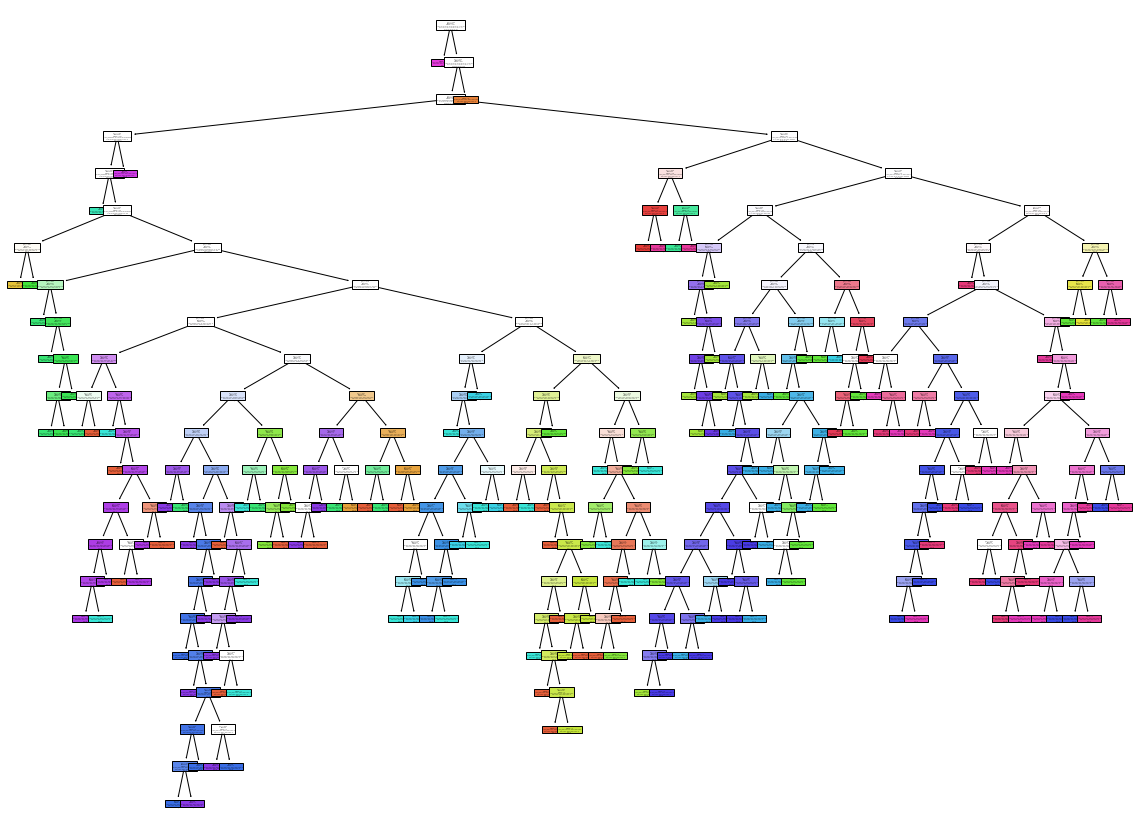

In [213]:
from sklearn import tree    #Visualization of decision tree
plt.figure(figsize=(20,15))
tree.plot_tree(decmodel,filled=True)

In [214]:
from sklearn.ensemble import RandomForestClassifier   #Random forest classifier technique
rnmodel=RandomForestClassifier(random_state=0)
rnmodel.fit(X_train,y_train)
rnpred=rnmodel.predict(X_test)
e=accuracy_score(y_test,rnpred)
e

0.9602150537634409

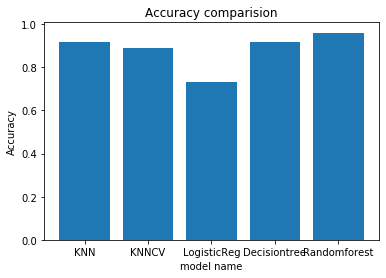

In [215]:
x= ['KNN','KNNCV','LogisticReg','Decisiontree','Randomforest']  #Plotting accuracy of all the models
y=[a,b,c,d,e]
plt.bar(x, y)
plt.xlabel('model name')
plt.ylabel('Accuracy')
plt.title('Accuracy comparision') 
plt.show()
